## Lending Club Case Study

Objectives
1) Identify Risk loan applications
2) Identify the driving factors - loan attributes and customer attributes behind loan default

In [377]:
# Step 1: import the required libraries  
## python version 3.12.14
import pandas as pd  ## v 2.2.2
import numpy as np  ## v 1.26.4
import matplotlib.pyplot as plt  ## v 3.8.4
import seaborn as sns  ## v 0.13.2

In [166]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [168]:
# step 2 : load the loan dataset
df_raw = pd.read_csv("loan.csv", low_memory = False)

### Data Cleanup

In [171]:
# Check the column and types info
df_raw.shape

(39717, 111)

In [172]:
# print all columns
pd.set_option('display.max_columns', None)  # None means no limit

In [176]:
df_raw.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [178]:
# Identify columns and clean them that either has null/nan values or 0 values in all the rows
#drop columns that all have nan
df_non_nan = df_raw.dropna(axis=1, how='all')

# Drop columns that have only 0s
df_non_nan_zero = df_non_nan.loc[:, (df_non_nan != 0).any(axis=0)]

# Drop columns where all values (including NaN) are the same
df_non_nan_zero = df_non_nan_zero.loc[:, df_non_nan.nunique(dropna=False) > 1]


In [180]:
df_non_nan_zero.shape

(39717, 51)

In [182]:
# check how much nan values are there per column
df_non_nan_zero.isna().mean()*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [184]:
# next payment date, mths_since_last_record column has high nan % and also seems non relevant, so could be removed.
# application_type is all Individual. So we can get rid of it.
df_non_nan_zero = df_non_nan_zero.drop(columns=["mths_since_last_record","next_pymnt_d"])

In [186]:
# lets check the columns that has either same values or nan
columns_with_multiple_values = []
cols = []
    
for col in df_non_nan_zero.columns:
    # Get the unique values in the column
    unique_values = df_non_nan_zero[col].nunique()
        
    if unique_values > 1:
        columns_with_multiple_values.append(col)
    else:
        cols.append(col)
    
print(cols)

['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']


In [188]:
# as these columns not having the data of our relevance as its all o or nan. so lets remove them
df_non_nan_zero = df_non_nan_zero.drop(columns=cols)

In [190]:
df_non_nan_zero.shape

(39717, 46)

In [192]:
# Now based on the data dictionary lets also remove columns that are not of our relevance
non_relevant_cols = ["member_id", "url", "emp_title", "title", "desc", "issue_d", "earliest_cr_line", "mths_since_last_delinq", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d","recoveries"]
df_rel_data = df_non_nan_zero.drop(columns=non_relevant_cols)

In [194]:
df_rel_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'pub_rec_bankruptcies'],
      dtype='object')

In [196]:
# Lets check datatype of our remaining colunms. Mainly the ones which are type object are interested as we might need to fix the format.
df_rel_data.select_dtypes(include=["object"]).head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state,revol_util
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Fully Paid,credit_card,860xx,AZ,83.70%
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Charged Off,car,309xx,GA,9.40%
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Fully Paid,small_business,606xx,IL,98.50%
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Fully Paid,other,917xx,CA,21%
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Current,other,972xx,OR,53.90%


In [198]:
# lets create a copy of this df and name as df_clean
df_clean = df_rel_data

In [200]:
# clean up term as we do not need months in end to use in our calculation
df_clean["term"] = df_clean["term"].str.replace(" months","").astype(int)

In [202]:
# clean up interest rate as we do need % in end
df_clean["int_rate"] = df_clean["int_rate"].str.replace("%","").astype(float)

In [204]:
# clean up revolving balance utilization as we do not need % in end
df_clean["revol_util"] = df_clean["revol_util"].str.replace("%","").astype(float)

In [206]:
df_clean.isna().mean()*100 

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
total_pymnt             0.000000
total_pymnt_inv         0.000000
total_rec_prncp         0.000000
total_rec_

In [208]:
# So we have three columns left with NAN values. So lets first fix them.

In [210]:
df_clean["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [212]:
# As the major pub_rec_bankruptcies and revol_util lies with 0.0. So we will assign the 0.0 value to the NAN
df_clean["pub_rec_bankruptcies"] = df_clean["pub_rec_bankruptcies"].fillna(0.0)
#df_clean["revol_util"] = df_clean["revol_util"].fillna(0.0)

In [214]:
# Employee length missing values are considerable and can't be filled with the mode value i.e 10+ as it might exaggarate the information,
# so leaving as it is.

### Outlier treatment

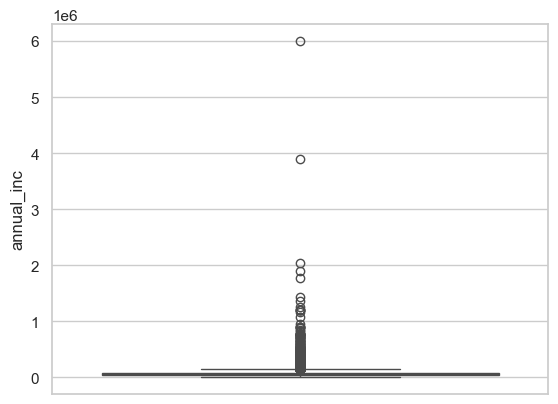

In [217]:
# Lets see how the data range of income level looks like
sns.boxplot(df_clean["annual_inc"])
plt.show()

In [218]:
# with this above, we clearly see some outliers in this data. So lets first get rid of them
Q1 = df_clean["annual_inc"].quantile(0.25)
Q3 = df_clean["annual_inc"].quantile(0.75)
IQR = Q3 - Q1

df_clean = df_clean[(df_clean["annual_inc"] > Q1 - 1.5*IQR) & (df_clean["annual_inc"] < Q3 + 1.5*IQR)]

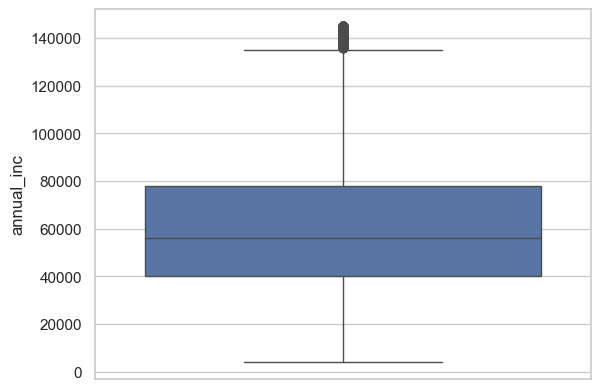

In [221]:
# lets plot this again to see 
sns.boxplot(df_clean["annual_inc"])
plt.show()

### Data Analysis

In [224]:
###### The objective of this case study is to identify a risky loan application, lets first list down the factors that provide insight 
###### on the repayment health of the borrower and not likely to get defaulted
###### 1) Income level (attribute - annual_inc ) 
###### 2) Debt to income ratio (attribute - dti)
###### 3) Purpose of loan (attribute - purpose)
###### 4) Credit utlization ratio (attribute - revol_util)
###### 5) Impact of Interest rates
###### 6) Impact of Geoprahical location
###### 7) Risk indicators like Verification status, Grades .

In [226]:
# Also lets check first what is the count of data we have against various loan status
df_clean.groupby("loan_status")["id"].count()

loan_status
Charged Off     5431
Current         1057
Fully Paid     31386
Name: id, dtype: int64

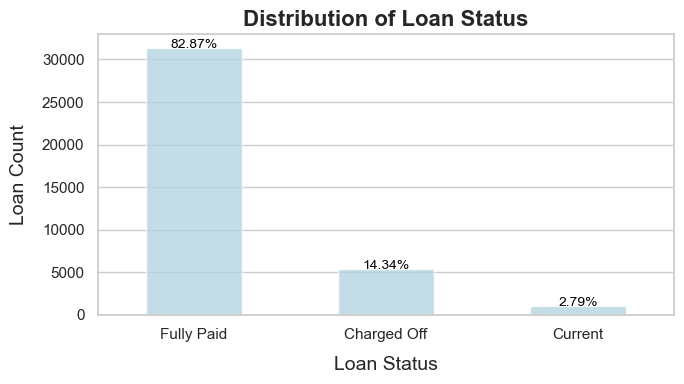

In [230]:
# Plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1)

# Calculate percentages for each loan status
loan_status_counts = df_clean['loan_status'].value_counts()
total_loans = loan_status_counts.sum()
percentages = (loan_status_counts / total_loans) * 100

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(
    data=df_clean,
    x='loan_status',
    color='lightblue', 
    alpha=0.8, 
    width=0.5,
    ax=ax
)

# Annotate the bars with percentages
for bar, label in zip(ax.patches, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 10,  # Y-coordinate, slightly above the bar
        f"{label:.2f}%",  # Annotation text
        ha='center',  # Horizontal alignment
        fontsize=10,  # Font size
        color='black'  # Font color
    )

# Add labels and title
ax.set_xlabel('Loan Status', fontsize=14, labelpad=10)
ax.set_ylabel('Loan Count', fontsize=14, labelpad=10)
ax.set_title('Distribution of Loan Status', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [234]:
# So we have only 15% of data that is charged off and evaluating it with Fully paid data will be biased. So lets isoloate only 
# charged off data and study that
df_charged_off = df_clean[df_clean["loan_status"] == "Charged Off"]

### Univariate Analysis

In [237]:
# 1 Income Level. 

In [239]:
# So this looks clean. Now let's plot the distribution to see what income group has defaulted most

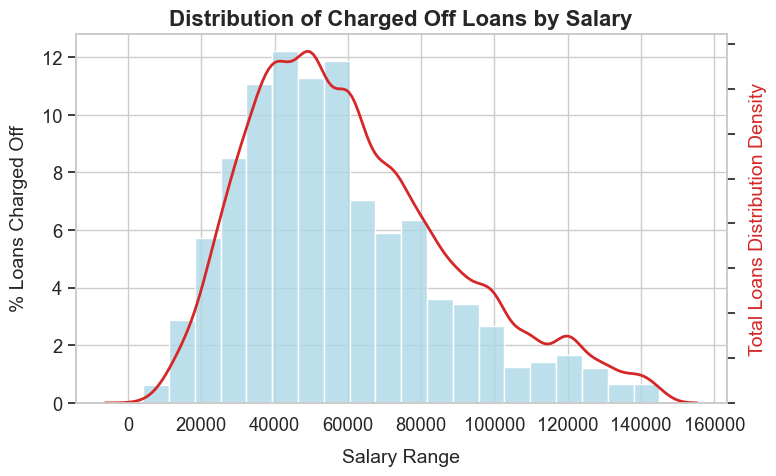

In [241]:
# Plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

fig, ax1 = plt.subplots(figsize=(8, 5))

sns.histplot(
    data=df_clean[df_clean["loan_status"]=="Charged Off"], 
    x='annual_inc', 
    stat='percent',  # Set stat to 'percent'
    bins=20, 
    color='lightblue',
    alpha=0.8,
    ax=ax1
)

ax1.set_xlabel('Salary Range', fontsize=14, labelpad=10)
ax1.set_ylabel('% Loans Charged Off', fontsize=14, labelpad=10)

# Create a second y-axis for the density curve
ax2 = ax1.twinx()

# Density plot for percentage of defaulters per category
sns.kdeplot(
    data=df_clean, 
    x='annual_inc',  
    color='tab:red', 
    linewidth=2
)

ax2.tick_params(axis='y', labelleft=False, labelright=False)  # Hides the y-axis ticks and labels for ax2
ax2.grid(False)  # Removes the gridlines associated with ax2
ax2.set_ylabel('Total Loans Distribution Density', fontsize=14, labelpad=10, color="tab:red")

# Customize the plot
plt.xlabel('Salary', fontsize=14)
plt.title('Distribution of Charged Off Loans by Salary', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

#### Insight 1 - Higher number of borrowers are falling in smaller salary brackets specially between 30000 to 60000 salary range and large number of defaulters also coming from these salary bracket

In [243]:
# Lets see Employment length i.e from many years a borrower is working on impact of loan defaults

In [246]:
# Step 2: Calculate metrics
summary = df_clean.groupby('emp_length').loan_status.value_counts(normalize=False).unstack(fill_value=0)
summary['total'] = summary.sum(axis=1)
summary['charged_off_perc'] = (summary["Charged Off"]*100)/summary["Charged Off"].sum()
summary['total_loans_perc'] = (summary['total']*100 / summary['total'].sum())  # number of loan applications in the salary bracket vs total applications
summary.reset_index(inplace=True)
summary["emp_length_sort"] = summary["emp_length"].str.replace("[year|years|+]","",regex=True).str.replace("< 1","0").astype(int)
summary.set_index("emp_length_sort", inplace=True)
summary.sort_values(by="emp_length_sort", inplace=True)

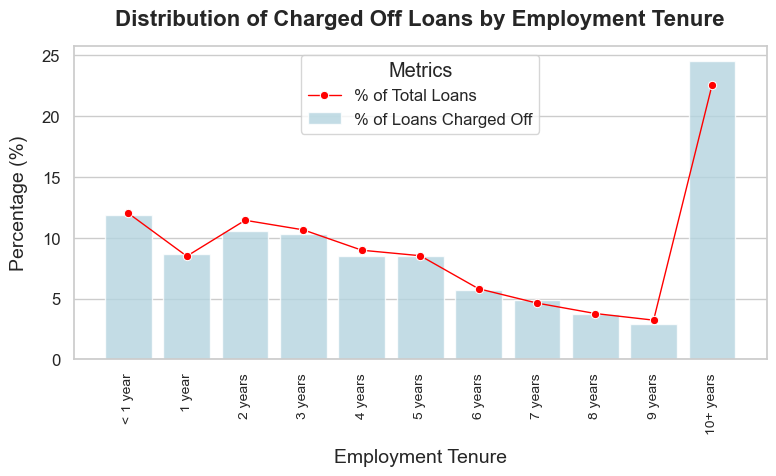

In [248]:
# plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot for the number of charged-off loans
sns.barplot(
    data=summary, 
    x='emp_length', 
    y='charged_off_perc', 
    color='lightblue', 
    alpha=0.8, 
    ax=ax,
    label='% of Loans Charged Off',
)

# Line plot for density of charged-off loans
ax2 = ax1.twinx()
sns.lineplot(
    data=summary, 
    x='emp_length',  # Numerical indices for the line plot
    y='total_loans_perc', 
    color='red', 
    marker='o', 
    linewidth=1, 
    ax=ax,
    label='% of Total Loans',
)

# Customize labels and legend
ax.set_xlabel('Employment Tenure', fontsize=14, labelpad=10)
#ax.set_xticklabels(summary["emp_length"])
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=10)
ax.set_title('Distribution of Charged Off Loans by Employment Tenure', fontsize=16, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=12, loc='upper center', title='Metrics')

# Tight layout
fig.tight_layout()
plt.show()

#### Insight 2- Loan defaulter % is high in case of Employment tenure less than 4-5 years and then decreases gradually. However the last bucket 10+ years is a big bucket and has higher number of loan applications as well. 



In [251]:
# Let's study the impact of purpose of loan on loan status

In [253]:
# Step 2: Calculate metrics
summary = df_clean.groupby('purpose').loan_status.value_counts(normalize=False).unstack(fill_value=0)
summary['total'] = summary.sum(axis=1)
summary['charged_off_perc'] = (summary["Charged Off"]*100)/summary["Charged Off"].sum()
summary['total_loans_perc'] = (summary['total']*100 / summary['total'].sum())  # number of loan applications in the salary bracket vs total applications
summary.reset_index(inplace=True)

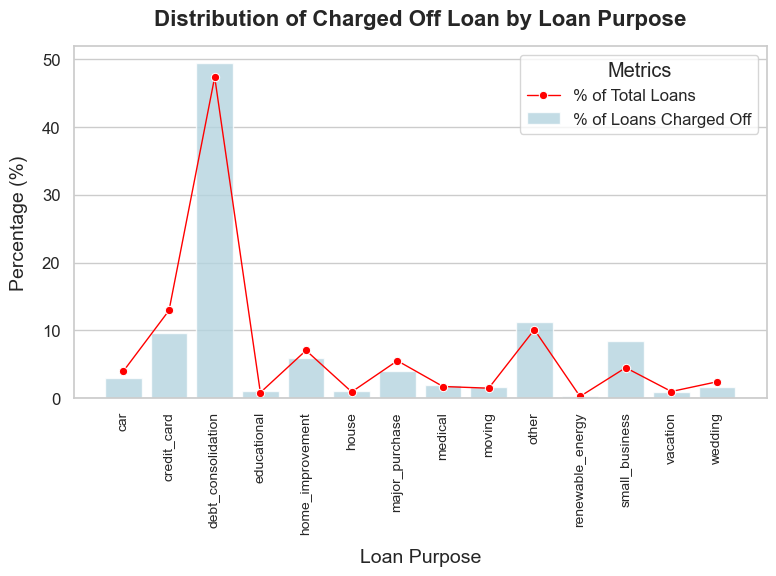

In [255]:
# plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot for the number of charged-off loans
sns.barplot(
    data=summary, 
    x='purpose', 
    y='charged_off_perc', 
    color='lightblue', 
    alpha=0.8, 
    ax=ax,
    label='% of Loans Charged Off',
)

# Line plot for density of charged-off loans
ax2 = ax1.twinx()
sns.lineplot(
    data=summary, 
    x='purpose',  # Numerical indices for the line plot
    y='total_loans_perc', 
    color='red', 
    marker='o', 
    linewidth=1, 
    ax=ax,
    label='% of Total Loans',
)

# Customize labels and legend
ax.set_xlabel('Loan Purpose', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=10)
ax.set_title('Distribution of Charged Off Loan by Loan Purpose', fontsize=16, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=12, loc='upper right', title='Metrics')

# Tight layout
fig.tight_layout()
plt.show()

##### Insight 3- So this gives the insight that the following four categories are risky categories
##### 1) Debt_Consolidation
##### 2) Small Business
##### 3) credit card
##### 4) other

In [258]:
# Lets check for verification status attribute

In [260]:
# Step 2: Calculate metrics
summary = df_clean.groupby('verification_status').loan_status.value_counts(normalize=False).unstack(fill_value=0)
summary['total'] = summary.sum(axis=1)
summary['charged_off_perc'] = (summary["Charged Off"]*100)/summary["Charged Off"].sum()
summary['total_loans_perc'] = (summary['total']*100 / summary['total'].sum())  # number of loan applications in the salary bracket vs total applications

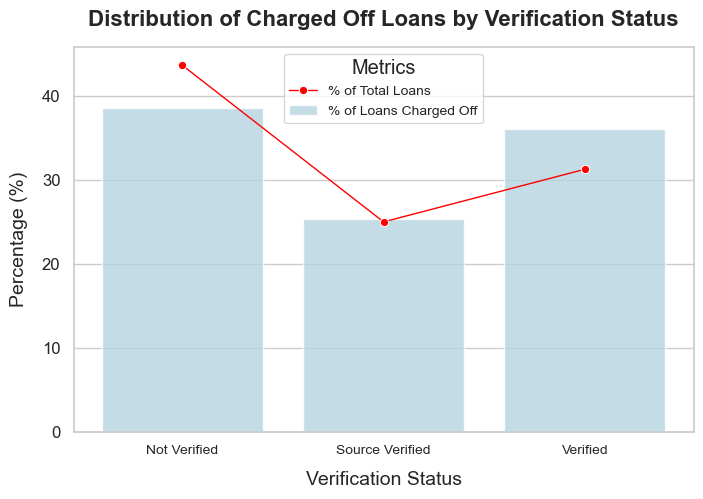

In [262]:
# plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot for the number of charged-off loans
sns.barplot(
    data=summary, 
    x='verification_status', 
    y='charged_off_perc', 
    color='lightblue', 
    alpha=0.8, 
    ax=ax,
    label='% of Loans Charged Off',
)

# Line plot for density of charged-off loans
ax2 = ax1.twinx()
sns.lineplot(
    data=summary, 
    x='verification_status',  # Numerical indices for the line plot
    y='total_loans_perc', 
    color='red', 
    marker='o', 
    linewidth=1, 
    ax=ax,
    label='% of Total Loans',
)

# Customize labels and legend
ax.set_xlabel('Verification Status', fontsize=14, labelpad=10)
#ax.set_xticklabels(summary["emp_length"])
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=10)
ax.set_title('Distribution of Charged Off Loans by Verification Status', fontsize=16, fontweight='bold', pad=15)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=10, loc='upper center', title='Metrics')

# Tight layout
#fig.tight_layout()
plt.show()

#### Insight 4 - Unverified status applications have also been granted loans and the default % of such applications is also high. Verification is to be done thoroughly and loans should not approved for unverified loan applications

In [265]:
# Lets check for Home Ownership attribute to add as a security in the loan repayment

In [267]:
# Step 2: Calculate metrics
summary = df_clean.groupby('home_ownership').loan_status.value_counts(normalize=False).unstack(fill_value=0)
summary['total'] = summary.sum(axis=1)
summary['charged_off_perc'] = (summary["Charged Off"]*100)/summary["Charged Off"].sum()
summary['total_loans_perc'] = (summary['total']*100 / summary['total'].sum())  # number of loan applications in the salary bracket vs total applications
summary.sort_values(by="charged_off_perc", inplace=True)

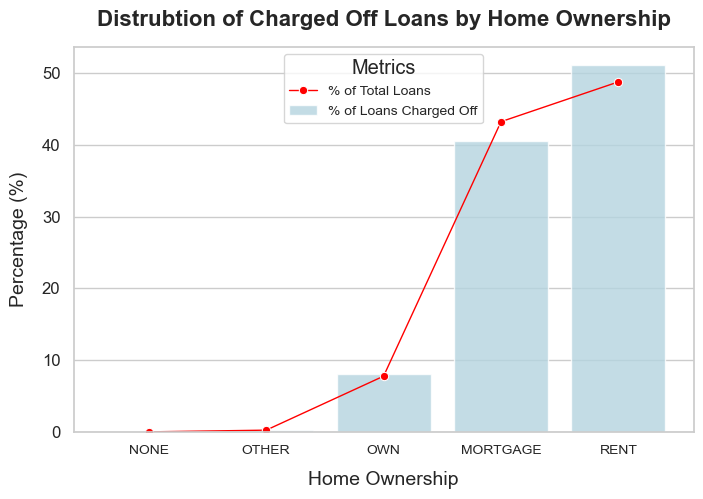

In [269]:
# plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot for the number of charged-off loans
sns.barplot(
    data=summary, 
    x='home_ownership', 
    y='charged_off_perc', 
    color='lightblue', 
    alpha=0.8, 
    ax=ax,
    label='% of Loans Charged Off',
)

# Line plot for density of charged-off loans
ax2 = ax1.twinx()
sns.lineplot(
    data=summary, 
    x='home_ownership',  # Numerical indices for the line plot
    y='total_loans_perc', 
    color='red', 
    marker='o', 
    linewidth=1, 
    ax=ax,
    label='% of Total Loans',
)

# Customize labels and legend
ax.set_xlabel('Home Ownership', fontsize=14, labelpad=10)
#ax.set_xticklabels(summary["emp_length"])
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=10)
ax.set_title('Distrubtion of Charged Off Loans by Home Ownership', fontsize=16, fontweight='bold', pad=15)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=10, loc='upper center', title='Metrics')

# Tight layout
#fig.tight_layout()
plt.show()

#### Insight 5 - People owning a home (adds a security and denote a financial stability of a person) tend to default less than people having mortgaged properties or Rented properties.

In [272]:
# Lets study the geographical parameter

In [274]:
# Step 2: Calculate metrics
summary = df_clean.groupby('addr_state').loan_status.value_counts(normalize=False).unstack(fill_value=0)
summary['total'] = summary.sum(axis=1)
summary['charged_off_perc'] = (summary["Charged Off"]*100)/summary["Charged Off"].sum()
summary['total_loans_perc'] = (summary['total']*100 / summary['total'].sum())  # number of loan applications in the salary bracket vs total applications
summary.sort_values(by="charged_off_perc", inplace=True)

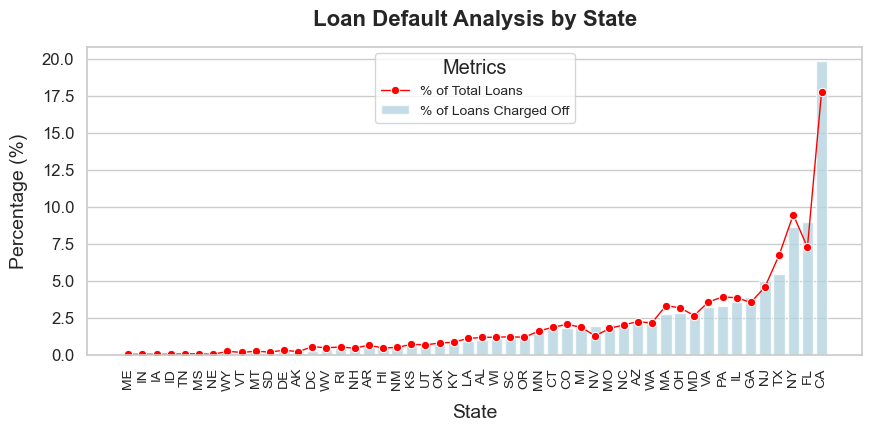

In [276]:
# plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 4))

# Bar plot for the number of charged-off loans
sns.barplot(
    data=summary, 
    x='addr_state', 
    y='charged_off_perc', 
    color='lightblue', 
    alpha=0.8, 
    ax=ax,
    label='% of Loans Charged Off',
)

# Line plot for density of charged-off loans
ax2 = ax1.twinx()
sns.lineplot(
    data=summary, 
    x='addr_state',  # Numerical indices for the line plot
    y='total_loans_perc', 
    color='red', 
    marker='o', 
    linewidth=1, 
    ax=ax,
    label='% of Total Loans',
)

# Customize labels and legend
ax.set_xlabel('State', fontsize=14, labelpad=10)
#ax.set_xticklabels(summary["emp_length"])
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=10)
ax.set_title('Loan Default Analysis by State', fontsize=16, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=10, loc='upper center', title='Metrics')

# Tight layout
#fig.tight_layout()
plt.show()

#### Insight 6- States as New Jersey, Texas, New York, Florida and California has higher number of loan defaults and california is showing a bigger spurt. The lending compnay should keep the interest rates high for these states

In [279]:
# Lets now understand how the asigned Grades to the loan applications performed 

In [281]:
# Step 2: Calculate metrics
summary = df_clean.groupby('grade').loan_status.value_counts(normalize=False).unstack(fill_value=0)
summary['total'] = summary.sum(axis=1)
summary['charged_off_perc'] = (summary["Charged Off"]*100)/summary["Charged Off"].sum()
summary['total_loans_perc'] = (summary['total']*100 / summary['total'].sum())  # number of loan applications in the salary bracket vs total applications

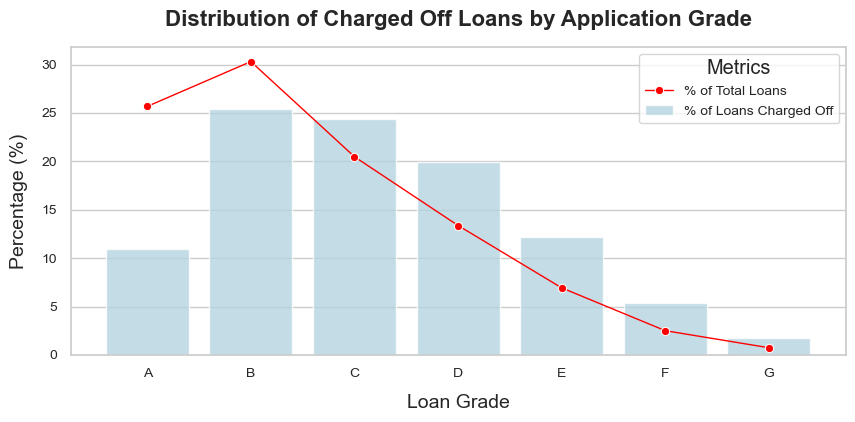

In [283]:
# plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 4))

# Bar plot for the number of charged-off loans
sns.barplot(
    data=summary, 
    x='grade', 
    y='charged_off_perc', 
    color='lightblue', 
    alpha=0.8, 
    ax=ax,
    label='% of Loans Charged Off',
)

# Line plot for density of charged-off loans
ax2 = ax1.twinx()
sns.lineplot(
    data=summary, 
    x='grade',  # Numerical indices for the line plot
    y='total_loans_perc', 
    color='red', 
    marker='o', 
    linewidth=1, 
    ax=ax,
    label='% of Total Loans',
)

# Customize labels and legend
ax.set_xlabel('Loan Grade', fontsize=14, labelpad=10)
#ax.set_xticklabels(summary["emp_length"])
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=10)
ax.set_title('Distribution of Charged Off Loans by Application Grade', fontsize=16, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10, loc='upper right', title='Metrics')

# Tight layout
#fig.tight_layout()
plt.show()

#### Insight 7 - The Loan application grading mechanism that is assigning grades of A, B, C needs to be restructured as its not able to detect the loan applications that are likely going to default. 

In [286]:
# Now lets study the impact of Debt to Income Ratio

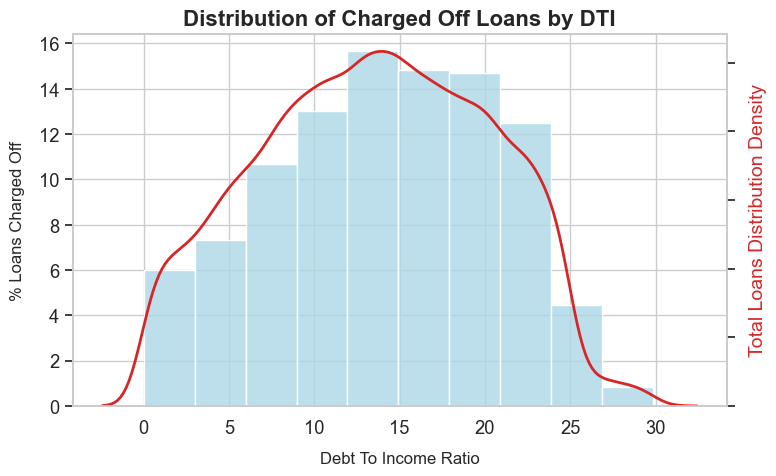

In [288]:
# Plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

fig, ax1 = plt.subplots(figsize=(8, 5))

sns.histplot(
    data=df_clean[df_clean["loan_status"]=="Charged Off"], 
    x='dti', 
    stat='percent',  # Set stat to 'percent'
    bins=10, 
    color='lightblue',
    alpha=0.8,
    ax=ax1
)

ax1.set_xlabel('Debt To Income Ratio', fontsize=12, labelpad=10)
ax1.set_ylabel('% Loans Charged Off', fontsize=12, labelpad=10)

# Create a second y-axis for the density curve
ax2 = ax1.twinx()

# Density plot for percentage of defaulters per category
sns.kdeplot(
    data=df_clean, 
    x='dti',  
    color='tab:red', 
    linewidth=2
)

ax2.tick_params(axis='y', labelleft=False, labelright=False)  # Hides the y-axis ticks and labels for ax2
ax2.grid(False)  # Removes the gridlines associated with ax2
ax2.set_ylabel('Total Loans Distribution Density', fontsize=14, labelpad=10, color="tab:red")

# Customize the plot
plt.xlabel('Debt To Income Ratio', fontsize=10)
plt.title('Distribution of Charged Off Loans by DTI', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

#### Insight 8 - A dti lower than 35 determines a good financial health of the borrower. Seems the Lending club has followed this policy and do not have any defaulter with higher dti. 

In [290]:
# Let's study the revolving credit utilization ratio impact

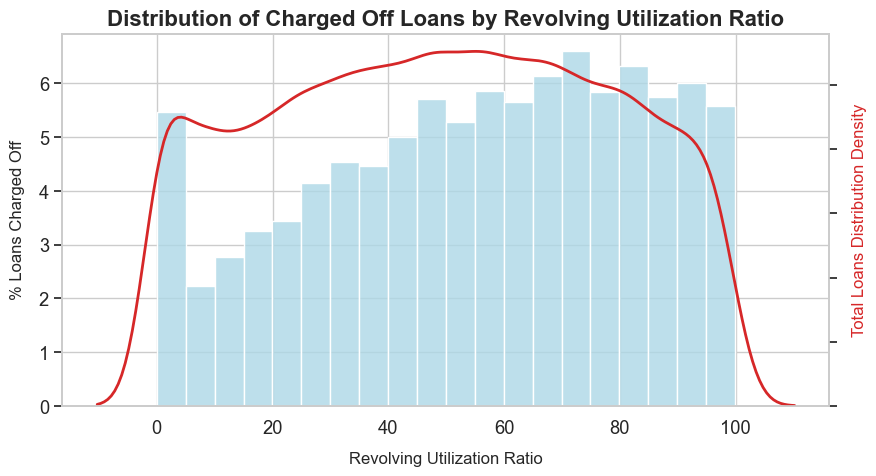

In [293]:
# Plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

fig, ax1 = plt.subplots(figsize=(9, 5))

sns.histplot(
    data=df_clean[df_clean["loan_status"]=="Charged Off"], 
    x='revol_util', 
    stat='percent',  # Set stat to 'percent'
    bins=20, 
    color='lightblue',
    alpha=0.8,
    ax=ax1
)

ax1.set_xlabel('Revolving Utilization Ratio', fontsize=12, labelpad=10)
ax1.set_ylabel('% Loans Charged Off', fontsize=12, labelpad=10)

# Create a second y-axis for the density curve
ax2 = ax1.twinx()

# Density plot for percentage of defaulters per category
sns.kdeplot(
    data=df_clean, 
    x='revol_util',  
    color='tab:red', 
    linewidth=2
)

ax2.tick_params(axis='y', labelleft=False, labelright=False)  # Hides the y-axis ticks and labels for ax2
ax2.grid(False)  # Removes the gridlines associated with ax2
ax2.set_ylabel('Total Loans Distribution Density', fontsize=12, labelpad=10, color="tab:red")

# Customize the plot
plt.xlabel('Debt To Income Ratio', fontsize=12)
plt.title('Distribution of Charged Off Loans by Revolving Utilization Ratio', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

#### Insight 9 - With exception of revolving credit util near 0, lower the revolving utilization ratio, lower the chances of defaulter cases 

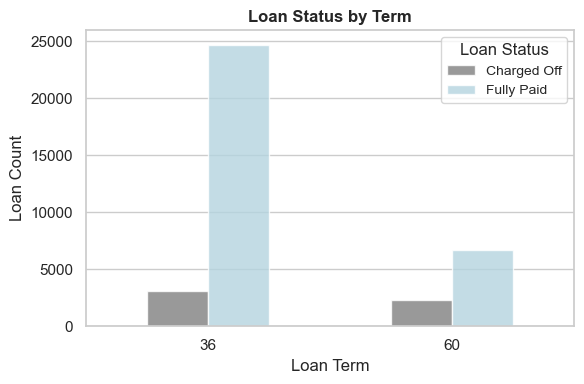

In [295]:
# Now Let's check the distribution of Loan term across the data
summary = df_clean.groupby(["term", "loan_status"]).size().reset_index(name="count")
# Plot grouped bar chart
sns.set_theme(style='whitegrid', font='Arial', font_scale=1)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=summary[summary["loan_status"]!="Current"],
    x="term",
    y="count",
    hue="loan_status",
    alpha=0.8,
    palette=["grey","lightblue"],
    width=0.5
)

# Add labels and title
plt.xlabel("Loan Term", fontsize=12)
plt.ylabel("Loan Count", fontsize=12)
plt.title("Loan Status by Term", fontsize=12, fontweight="bold")
plt.legend(title="Loan Status", fontsize=10)
plt.tight_layout()
plt.show()

#### Insight 10 - Loans with a 36-month term exhibit significantly lower default rates compared to 60-month term loans.

### Segmented Univariate Analysis - Avg of Loan amount on Loan Purpose

In [299]:
# Average laon amount across all segments
df_clean["funded_amnt"].mean()

10614.453186882822

In [301]:
summary = df_clean.groupby("loan_status")["funded_amnt"].mean().sort_values().to_frame().reset_index()
summary

,loan_status,funded_amnt
0,Fully Paid,10279.210476
1,Charged Off,11504.851777
2,Current,15993.992431


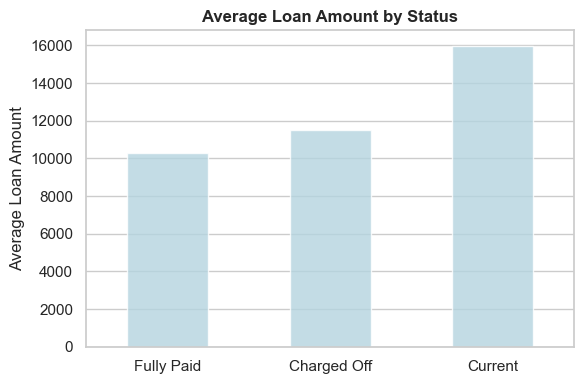

In [303]:
# Plot grouped bar chart
sns.set_theme(style='whitegrid', font='Arial', font_scale=1)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=summary,
    x="loan_status",
    y="funded_amnt",
    alpha=0.8,
    color="lightblue",
    width=0.5
)

# Add labels and title
plt.xlabel("", fontsize=12)
plt.ylabel("Average Loan Amount", fontsize=12)
plt.title("Average Loan Amount by Status", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

In [309]:
df_clean[df_clean["loan_status"]=="Charged Off"].groupby("purpose")["funded_amnt"].mean().sort_values()

purpose
moving                 5557.222222
vacation               5650.961538
car                    7207.075472
renewable_energy       7329.166667
educational            7397.685185
other                  7730.766063
medical                8670.673077
major_purchase         8693.087558
wedding               10649.462366
home_improvement      11152.406832
house                 11434.545455
credit_card           12273.946360
debt_consolidation    12891.141952
small_business        13906.607930
Name: funded_amnt, dtype: float64

### Bivariate Analysis

In [312]:
# Let's now check the correlation of various continous variables of our inerest.

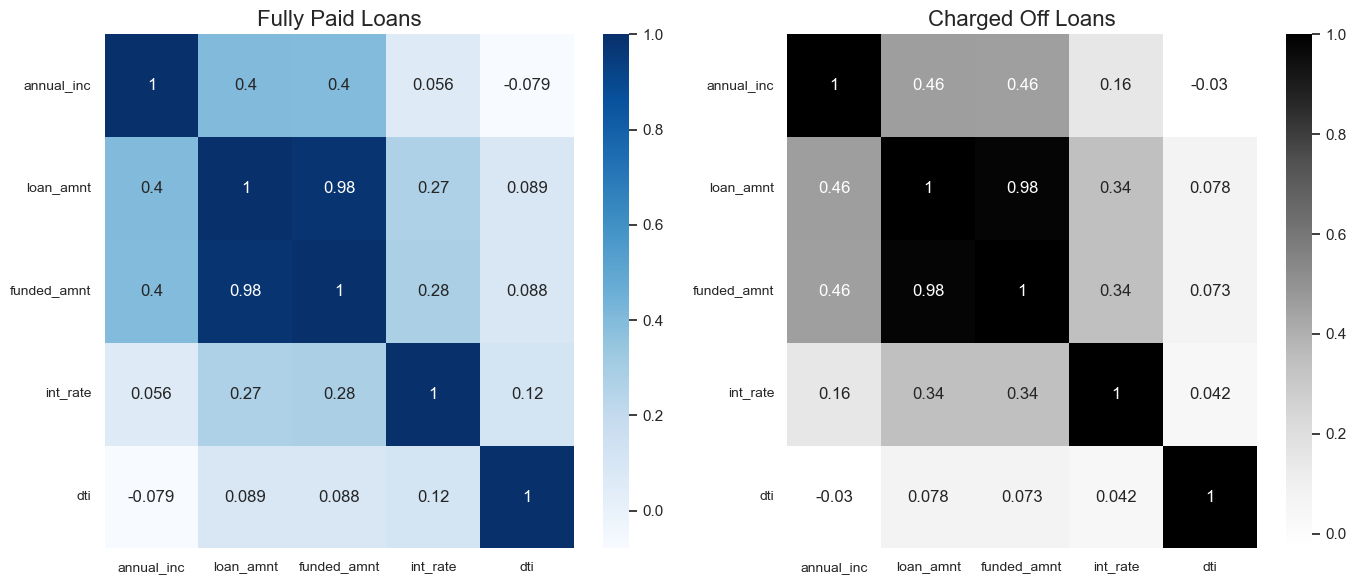

In [314]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# for fully paid loans
numeric_col = ["annual_inc", "loan_amnt", "funded_amnt", 'int_rate', "dti"]
loan_correlation = df_clean[df_clean["loan_status"]=="Fully Paid"][numeric_col].corr()
sns.set(font_scale=1)
sns.heatmap(loan_correlation, ax=ax[0],annot=True,cmap="Blues")
ax[0].set_title('Fully Paid Loans',fontsize=16)

# for charged off loans
numeric_col = ["annual_inc", "loan_amnt", "funded_amnt", 'int_rate', "dti"]
loan_correlation = df_clean[df_clean["loan_status"]=="Charged Off"][numeric_col].corr()
sns.set(font_scale=1)
sns.heatmap(loan_correlation, ax=ax[1], annot=True, cmap="Greys")

ax[1].set_title('Charged Off Loans',fontsize=16)
ax[0].tick_params(axis='x', rotation=0, labelsize=10)
ax[0].tick_params(axis='y', rotation=0, labelsize=10)

ax[1].tick_params(axis='x', rotation=0, labelsize=10)
ax[1].tick_params(axis='y', rotation=0, labelsize=10)

plt.tight_layout()
plt.show()

#### Insight 11 
- Correlation between annual income and funded amount is 0.4 in case of fully paid loans whereas its higher i.e. 0.46 in case of charged off loans.
- Correlation between Interest rates and annual income is 0.056 in case of fully paid loans whereas its higher i.e. 0.16 in case of charged off loans.
- Correlation between Interest rates and Debt-to-Income Ratio is 0.12 in case of fully paid loans whereas its lower i.e 0.042 in case of charged off loans.


In [316]:
# Bivariate analysis on Amount of Loan funded in comparison to Annual Salary and its variation on loan status

In [348]:
summary = df_clean[(df_clean["loan_status"] == "Fully Paid") | (df_clean["loan_status"] == "Charged Off")]
summary["loan_funded_perc"] = (summary["funded_amnt"]*100)/summary["annual_inc"]


In [350]:
## Quantile ranges for charged off loans
summary[summary["loan_status"] == "Charged Off"]["loan_funded_perc"].quantile([0.25,0.5,0.75])

0.25    11.770311
0.50    20.000000
0.75    29.885684
Name: loan_funded_perc, dtype: float64

In [352]:
## Quantile ranges for Fully Paid loans
summary[summary["loan_status"] == "Fully Paid"]["loan_funded_perc"].quantile([0.25,0.5,0.75])

0.25     9.861317
0.50    16.000000
0.75    24.242424
Name: loan_funded_perc, dtype: float64

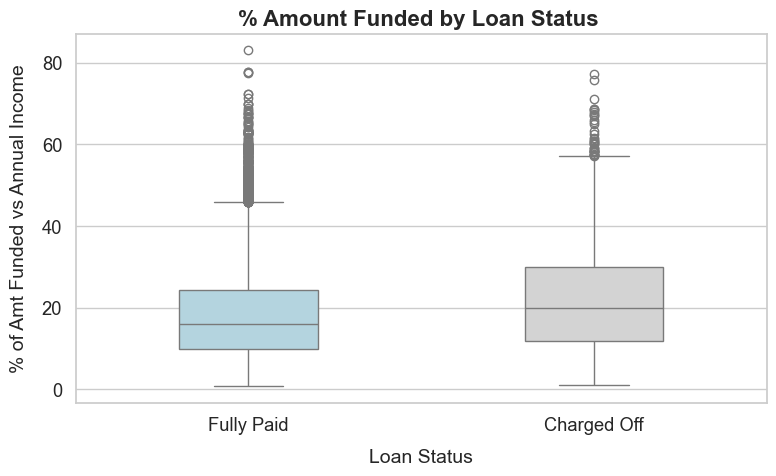

In [346]:
# Plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

fig, ax1 = plt.subplots(figsize=(8, 5))

# Define the color palette for categories
custom_palette = {
    'Charged Off': 'lightgrey',  # Replace with the exact category name for charged-off loans
    'Fully Paid': 'lightblue',  # Replace with the exact category name for fully paid loans
}

sns.boxplot(
    data=summary, 
    x='loan_status',
    y="loan_funded_perc",
     palette=custom_palette, 
    width=0.4,
    ax=ax1
)

ax1.set_xlabel('Loan Status', fontsize=14, labelpad=10)
ax1.set_ylabel('% of Amt Funded vs Annual Income', fontsize=14, labelpad=10)

# Customize the plot
plt.title('% Amount Funded by Loan Status ', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

#### Insight 12 - Most of the successful loans have % Amt Funded (to Annual Salary) lying in range of 10 – 24% with upper boundary of 45% Whereas most of the defaulted loans lying in range of 12-30% with upper boundary of 57%

In [322]:
# Bivariate analysis on Loan purpose vs Interest rate of Charged off loans.

In [324]:
median_order = df_clean[df_clean["loan_status"] == "Charged Off"].groupby('purpose')['int_rate'].median().sort_values(ascending=False).index

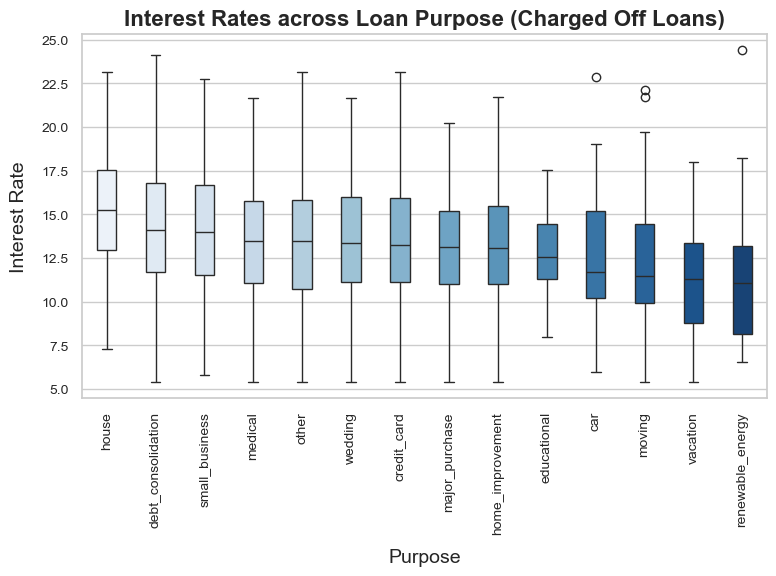

In [326]:
# Plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

fig, ax1 = plt.subplots(figsize=(8, 6))

# Define the color palette for categories

sns.boxplot(
    data=df_clean[df_clean["loan_status"]=="Charged Off"], 
    x='purpose',
    y="int_rate",
    order = median_order,
    ax=ax1,
    width=0.4,
    palette = sns.color_palette("Blues",14)
)

ax1.set_xlabel('Purpose', fontsize=14, labelpad=10)
ax1.set_ylabel('Interest Rate', fontsize=14, labelpad=10)

# Customize the plot
plt.title('Interest Rates across Loan Purpose (Charged Off Loans)', fontsize=16, fontweight='bold')
ax1.tick_params(axis='x', rotation=90, labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

plt.tight_layout()

plt.show()

#### Insight 13 - Loans for home and medical purposes are distributed at higher rates, while discretionary loans (e.g., vacation, car) at lower rates default more.

In [327]:
# Bivariate analysis for Interest Rate vs Home Ownership Status on charged off loans.

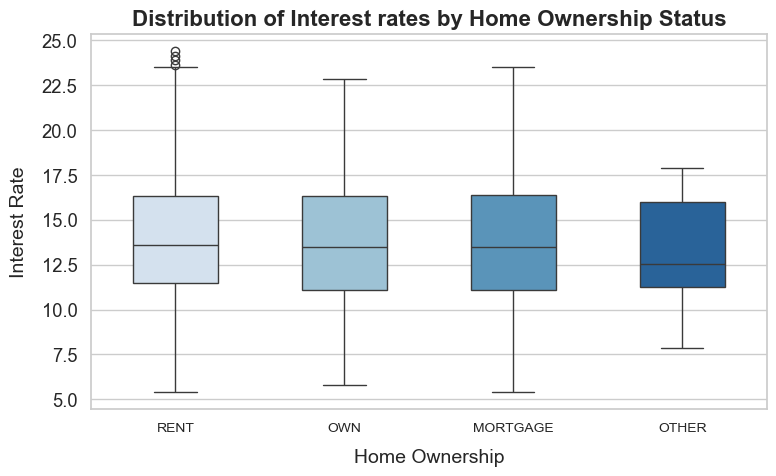

In [330]:
# Plot
sns.set_theme(style='whitegrid', font='Arial', font_scale=1.2)

fig, ax1 = plt.subplots(figsize=(8, 5))

# Define the color palette for categories

sns.boxplot(
    data=summary[summary["loan_status"] == "Charged Off"], 
    x='home_ownership',
    y="int_rate",
    ax=ax1,
    
    width=0.5,
    palette = sns.color_palette("Blues",4)
)

ax1.set_xlabel('Home Ownership', fontsize=14, labelpad=10)
ax1.set_ylabel('Interest Rate', fontsize=14, labelpad=10)

# Customize the plot
plt.title('Distribution of Interest rates by Home Ownership Status', fontsize=16, fontweight='bold')
ax1.tick_params(axis='x', rotation=0, labelsize=10)

plt.tight_layout()

plt.show()

#### Insight 14 - Interest rates for owned, rented, and mortgaged homes show similar distribution among defaulters.


### Consolidated Findings and Recommendations

1) Risk-Based Interest Rates: Increase interest rates for discretionary purposes and borrowers with low income or work experience.
2) Income-to-Loan Cap: Limit loans to a maximum of 40% of the borrower's annual salary.
3) Enhanced Regional Policies: Implement state-specific credit policies for high-risk states.
4) Targeted Grading Recalibration: Reassess loan grades to reflect updated risk patterns.
5) Promote Shorter Loan Terms: Encourage 36-month terms through better rates or benefits.
6) Improved Credit Checks: For renters and less experienced applicants, introduce stricter financial screening. 
7) Reduce exposure to high-risk loan purposes such as debt consolidation and small business loans.
